<a href="https://colab.research.google.com/github/abhiverma1924/Machine-Learning./blob/master/Keras_mniist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [0]:
data = pd.read_csv("sample_data/mnist_train_small.csv") 

In [0]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data = data.values

In [0]:
X =data[:,1:]

In [0]:
y=data[:,0]

In [0]:
ohe = OneHotEncoder(categories = "auto")

In [0]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y_hot, test_size=0.33, random_state=42)

In [0]:
in_layer = Input(shape=[784])

In [0]:
dense_1 = Dense(200,activation="tanh")(in_layer)
dense_2 = Dense(50,activation="tanh")(dense_1)
out = Dense(10,activation="softmax")(dense_2)


In [0]:
model = Model(inputs=[in_layer],outputs=[out])

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_24 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [107]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
13399/13399 [==============================] - 1s 70us/step - loss: 0.2143 - acc: 0.9304
Epoch 2/10
13399/13399 [==============================] - 0s 37us/step - loss: 0.2094 - acc: 0.9353
Epoch 3/10
13399/13399 [==============================] - 1s 38us/step - loss: 0.1944 - acc: 0.9397
Epoch 4/10
13399/13399 [==============================] - 1s 40us/step - loss: 0.1907 - acc: 0.9413
Epoch 5/10
13399/13399 [==============================] - 1s 40us/step - loss: 0.2010 - acc: 0.9371
Epoch 6/10
13399/13399 [==============================] - 1s 39us/step - loss: 0.1913 - acc: 0.9413
Epoch 7/10
13399/13399 [==============================] - 1s 40us/step - loss: 0.2070 - acc: 0.9338
Epoch 8/10
13399/13399 [==============================] - 1s 40us/step - loss: 0.1948 - acc: 0.9392
Epoch 9/10
13399/13399 [==============================] - 1s 41us/step - loss: 0.1967 - acc: 0.9397
Epoch 10/10
13399/13399 [==============================] - 1s 40us/step - loss: 0.1921 - acc: 0.9389

In [108]:
model.evaluate(X_test, y_test)

6600/6600 [==============================] - 0s 62us/step


[0.2436493328800707, 0.9277272727272727]

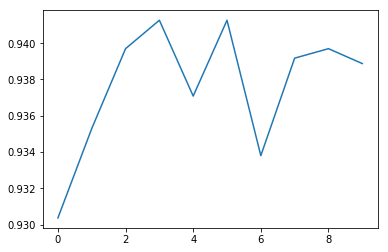

In [109]:
plt.plot(hist.history["acc"])

In [0]:
m2 = Model(inputs=[in_layer], outputs=[out])

In [0]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [112]:
m2.evaluate(X_test, y_test)

6600/6600 [==============================] - 1s 87us/step


[0.2436493328800707, 0.9277272727272727]

In [0]:
import cv2

In [0]:
image = cv2.imread("one.jpeg")

In [0]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)